## artClassifier best group

In [1]:
import math
import numpy as np
import pandas as pd
from data import *
from model import getLinealModel as linealModel, getLetnetModel as letNetModel
from model import getAlexnetModel as AlexNetModel, getVGGModel as VGGModel
import tensorflow as tf

%load_ext autoreload
%autoreload 2
tf.enable_eager_execution()

In [25]:
prepareDataset(r'C:\Users\USER\Desktop\Universidad\Grupo de estudio DeepLearning\ART_DATASET\Dataset')

IMG_20190422_132623.jpg.json
IMG_20190422_132635.jpg.json


In [2]:
metadata = pd.read_csv('metadata.csv')
metadata.head(5)

,imageLabel,imageName,split
0,0,1057647807416146105.PNG,train
1,1,7777032992991800190.PNG,test
2,0,13168081503562239814.PNG,train
3,0,2701515351254337681.PNG,train
4,2,15191594682468756303.PNG,train


In [3]:
metadata1 = pd.read_csv('metadata1.csv')
metadata1.head(5)

,imageLabel,imageName,split
0,0,1057647807416146105.PNG,train
1,1,9077592516827598342.PNG,train
2,2,15191594682468756303.PNG,train
3,3,5515792049071374849.PNG,train
4,4,1847357681393076345.PNG,train


In [4]:
trainSources = buildSources(metadata,r'C:\Users\USER\Desktop\Universidad\Grupo de estudio DeepLearning\artClassifier\image_files')
testSources = buildSources(metadata,r'\C:\Users\USER\Desktop\Universidad\Grupo de estudio DeepLearning\artClassifier\image_files', mode = 'test')
valSources = buildSources(metadata,r'C:\Users\USER\Desktop\Universidad\Grupo de estudio DeepLearning\artClassifier\image_files', mode = 'val')

In [5]:
trainSources[:5]

[('C:\\Users\\USER\\Desktop\\Universidad\\Grupo de estudio DeepLearning\\artClassifier\\image_files\\1057647807416146105.PNG',
  0),
 ('C:\\Users\\USER\\Desktop\\Universidad\\Grupo de estudio DeepLearning\\artClassifier\\image_files\\13168081503562239814.PNG',
  0),
 ('C:\\Users\\USER\\Desktop\\Universidad\\Grupo de estudio DeepLearning\\artClassifier\\image_files\\2701515351254337681.PNG',
  0),
 ('C:\\Users\\USER\\Desktop\\Universidad\\Grupo de estudio DeepLearning\\artClassifier\\image_files\\15191594682468756303.PNG',
  2),
 ('C:\\Users\\USER\\Desktop\\Universidad\\Grupo de estudio DeepLearning\\artClassifier\\image_files\\9077592516827598342.PNG',
  1)]

In [6]:
metadata[metadata['imageName']== '15191594682468756303.PNG']

,imageLabel,imageName,split
4,2,15191594682468756303.PNG,train


In [7]:
dataset = makeDataset(trainSources, training=True,
    batch_size=3, num_epochs=1,
    num_parallel_calls=3)

In [8]:
dataset = iter(dataset)

Instructions for updating:
Colocations handled automatically by placer.


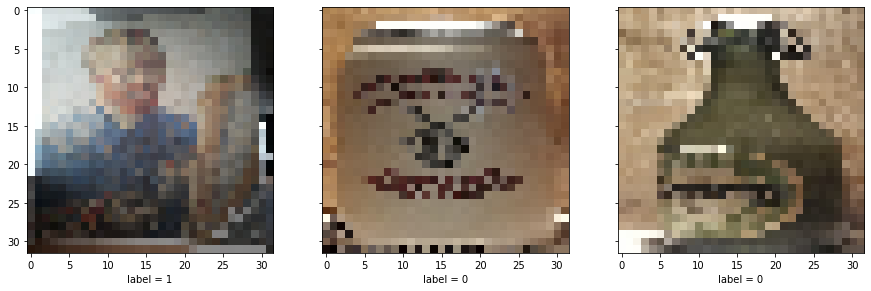

In [9]:
imshowThree(next(dataset))

## Modelo lineal

In [10]:
BACH_SIZE = 10
NUM_CLASSES = 5
VALIDATION_STEP = 1
LEARNING_RATE = 0.0001
EPOCHS = 80
EPOCHS_ONE = 50

In [13]:
modelOne = linealModel(NUM_CLASSES)
modelOne.compile(loss='sparse_categorical_crossentropy',
            optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
            metrics=['accuracy'])

In [16]:
modelOne.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [17]:
trainOneSource = buildSources(metadata1,r'C:\Users\USER\Desktop\Universidad\Grupo de estudio DeepLearning\artClassifier\image_files')

In [18]:
trainOneDataset = makeDataset(trainOneSource, training=True,
    batch_size=BACH_SIZE, num_epochs=EPOCHS_ONE,
    num_parallel_calls=2)

trainDataset = makeDataset(trainSources, training=True,
    batch_size=BACH_SIZE, num_epochs=None,
    num_parallel_calls=2)

valDataset = makeDataset(valSources, training=True,
    batch_size=BACH_SIZE, num_epochs=None,
    num_parallel_calls=2)

In [19]:
trainOneDataset

<DatasetV1Adapter shapes: ((?, 32, 32, ?), (?,)), types: (tf.float32, tf.int32)>

In [20]:
historyOne = modelOne.fit(x = trainOneDataset, epochs=EPOCHS_ONE, steps_per_epoch=1, initial_epoch=0)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.8726 - acc: 0.2000
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 1.8129 - acc: 0.2000
Epoch 3/50
1/1 [==============================] - 0s 234ms/step - loss: 1.7670 - acc: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 242ms/step - loss: 1.7294 - acc: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 191ms/step - loss: 1.6948 - acc: 0.2000
Epoch 6/50
1/1 [==============================] - 0s 226ms/step - loss: 1.6606 - acc: 0.2000
Epoch 7/50
1/1 [==============================] - 0s 222ms/step - loss: 1.6255 - acc: 0.2000
Epoch 8/50
1/1 [==============================] - 0s 218ms/step - loss: 1.5896 - acc: 0.2000
Epoch 9/50
1/1 [==============================] - 0s 229ms/step - loss: 1.5531 - acc: 0.2000
Epoch 10/50
1/1 [==============================] - 0s 246ms/step - loss: 1.5165 - acc: 0.2000
Epoch 11/50
1/1 [==============================] - 0s 237ms/step -

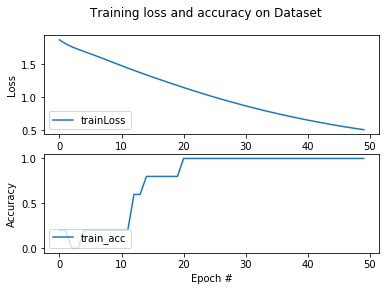

In [21]:
drawResults(historyOne,EPOCHS_ONE)

In [22]:
modelLineal = linealModel(NUM_CLASSES)
modelLineal.compile(loss='sparse_categorical_crossentropy',
            optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
            metrics=['accuracy'])

In [23]:
historyLineal = modelLineal.fit(x = trainDataset, epochs=EPOCHS, steps_per_epoch=(len(trainSources)//BACH_SIZE), initial_epoch=0,
                         validation_data = valDataset, validation_steps= VALIDATION_STEP)

Epoch 1/80
5/5 [==============================] - 10s 2s/step - loss: 1.7905 - acc: 0.1400 - val_loss: 1.6016 - val_acc: 0.2222
Epoch 2/80
5/5 [==============================] - 3s 592ms/step - loss: 1.3934 - acc: 0.5106 - val_loss: 1.4518 - val_acc: 0.2222
Epoch 3/80
5/5 [==============================] - 2s 489ms/step - loss: 1.3306 - acc: 0.4681 - val_loss: 1.4200 - val_acc: 0.2222
Epoch 4/80
5/5 [==============================] - 3s 620ms/step - loss: 1.2342 - acc: 0.5957 - val_loss: 1.4112 - val_acc: 0.2222
Epoch 5/80
5/5 [==============================] - 2s 432ms/step - loss: 1.3107 - acc: 0.5319 - val_loss: 1.3862 - val_acc: 0.2222
Epoch 6/80
5/5 [==============================] - 2s 420ms/step - loss: 1.2951 - acc: 0.4894 - val_loss: 1.3366 - val_acc: 0.2222
Epoch 7/80
5/5 [==============================] - 2s 446ms/step - loss: 1.2777 - acc: 0.5200 - val_loss: 1.3048 - val_acc: 0.3333
Epoch 8/80
5/5 [==============================] - 2s 462ms/step - loss: 1.2631 - acc: 0.4681

Epoch 40/80
5/5 [==============================] - 2s 387ms/step - loss: 0.9936 - acc: 0.5745 - val_loss: 1.3811 - val_acc: 0.1111
Epoch 41/80
5/5 [==============================] - 2s 388ms/step - loss: 0.9194 - acc: 0.6170 - val_loss: 1.3844 - val_acc: 0.3333
Epoch 42/80
5/5 [==============================] - 2s 473ms/step - loss: 0.8909 - acc: 0.6170 - val_loss: 1.3899 - val_acc: 0.3333
Epoch 43/80
5/5 [==============================] - 2s 415ms/step - loss: 0.9437 - acc: 0.5800 - val_loss: 1.3793 - val_acc: 0.2222
Epoch 44/80
5/5 [==============================] - 2s 414ms/step - loss: 0.9104 - acc: 0.6596 - val_loss: 1.3805 - val_acc: 0.2222
Epoch 45/80
5/5 [==============================] - 2s 410ms/step - loss: 0.8988 - acc: 0.6809 - val_loss: 1.3860 - val_acc: 0.1111
Epoch 46/80
5/5 [==============================] - 2s 394ms/step - loss: 0.9383 - acc: 0.6596 - val_loss: 1.3799 - val_acc: 0.3333
Epoch 47/80
5/5 [==============================] - 2s 385ms/step - loss: 0.8016 - a

Epoch 79/80
5/5 [==============================] - 2s 414ms/step - loss: 0.7042 - acc: 0.7600 - val_loss: 1.5022 - val_acc: 0.3333
Epoch 80/80
5/5 [==============================] - 2s 452ms/step - loss: 0.6823 - acc: 0.8298 - val_loss: 1.5061 - val_acc: 0.3333


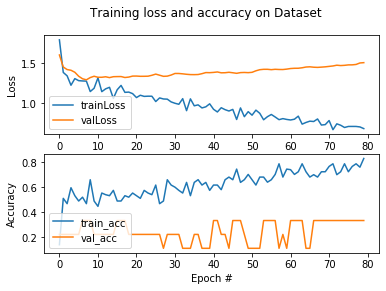

In [24]:
drawResults(historyLineal,EPOCHS, True)

## LetNet

In [21]:
BACH_SIZE = 10
NUM_CLASSES = 5
VALIDATION_STEP = 1
LEARNING_RATE = 0.0001
EPOCHS = 80
EPOCHS_ONE = 50

In [22]:
modelLetNet = letNetModel(NUM_CLASSES)
modelLetNet.compile(loss='sparse_categorical_crossentropy',
            optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
            metrics=['accuracy'])
modelLetNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 16)          6416      
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                5460      
__________

In [23]:
historyLeNet = modelLetNet.fit(x = trainDataset, epochs=EPOCHS, steps_per_epoch=(len(trainSources)//BACH_SIZE), initial_epoch=0,
                         validation_data = valDataset, validation_steps= VALIDATION_STEP)

Epoch 1/80
5/5 [==============================] - 10s 2s/step - loss: 1.5803 - acc: 0.3800 - val_loss: 1.6470 - val_acc: 0.1111
Epoch 2/80
5/5 [==============================] - 3s 612ms/step - loss: 1.5228 - acc: 0.5106 - val_loss: 1.6801 - val_acc: 0.2222
Epoch 3/80
5/5 [==============================] - 3s 577ms/step - loss: 1.4461 - acc: 0.5106 - val_loss: 1.7243 - val_acc: 0.2222
Epoch 4/80
5/5 [==============================] - 2s 346ms/step - loss: 1.3943 - acc: 0.5745 - val_loss: 1.7681 - val_acc: 0.2222
Epoch 5/80
5/5 [==============================] - 2s 384ms/step - loss: 1.3785 - acc: 0.5745 - val_loss: 1.8094 - val_acc: 0.2222
Epoch 6/80
5/5 [==============================] - 2s 432ms/step - loss: 1.4025 - acc: 0.5106 - val_loss: 1.8405 - val_acc: 0.2222
Epoch 7/80
5/5 [==============================] - 2s 476ms/step - loss: 1.3031 - acc: 0.5600 - val_loss: 1.8641 - val_acc: 0.2222
Epoch 8/80
5/5 [==============================] - 2s 465ms/step - loss: 1.3532 - acc: 0.5319

Epoch 40/80
5/5 [==============================] - 2s 380ms/step - loss: 1.2629 - acc: 0.5106 - val_loss: 2.0161 - val_acc: 0.2222
Epoch 41/80
5/5 [==============================] - 2s 419ms/step - loss: 1.1544 - acc: 0.5957 - val_loss: 1.9833 - val_acc: 0.2222
Epoch 42/80
5/5 [==============================] - 2s 401ms/step - loss: 1.0930 - acc: 0.6383 - val_loss: 1.9714 - val_acc: 0.2222
Epoch 43/80
5/5 [==============================] - 2s 382ms/step - loss: 1.1375 - acc: 0.5800 - val_loss: 1.9701 - val_acc: 0.2222
Epoch 44/80
5/5 [==============================] - 2s 466ms/step - loss: 1.1162 - acc: 0.6170 - val_loss: 2.0476 - val_acc: 0.2222
Epoch 45/80
5/5 [==============================] - 2s 388ms/step - loss: 1.0444 - acc: 0.6383 - val_loss: 2.0602 - val_acc: 0.2222
Epoch 46/80
5/5 [==============================] - 2s 418ms/step - loss: 1.1945 - acc: 0.5957 - val_loss: 2.0386 - val_acc: 0.2222
Epoch 47/80
5/5 [==============================] - 2s 398ms/step - loss: 1.1138 - a

Epoch 79/80
5/5 [==============================] - 2s 407ms/step - loss: 0.9981 - acc: 0.6800 - val_loss: 1.9955 - val_acc: 0.2222
Epoch 80/80
5/5 [==============================] - 2s 471ms/step - loss: 0.8439 - acc: 0.7660 - val_loss: 2.0634 - val_acc: 0.2222


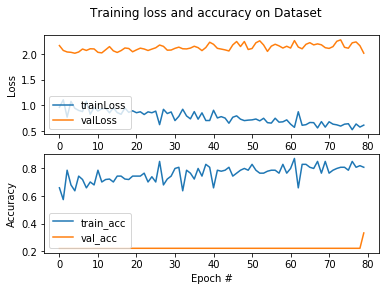

In [30]:
drawResults(historyLeNet,EPOCHS, True)

## AlexNet

In [10]:
BACH_SIZE = 10
NUM_CLASSES = 5
VALIDATION_STEP = 1
LEARNING_RATE = 0.0001
EPOCHS = 80
EPOCHS_ONE = 50

In [13]:
modelAlexNet = AlexNetModel(NUM_CLASSES)
modelAlexNet.compile(loss='sparse_categorical_crossentropy',
            optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
            metrics=['accuracy'])

In [7]:
trainAlexData = makeDataset(trainSources, training = True,
                           batch_size = BACH_SIZE, num_epochs=EPOCHS,
                           num_parallel_calls = 2, pixels = 224)
valAlexData = makeDataset(valSources, training = True,
                           batch_size = BACH_SIZE, num_epochs=EPOCHS,
                           num_parallel_calls = 2, pixels = 224)

In [34]:
historyAlexNet = modelAlexNet.fit(x = trainAlexData, epochs=EPOCHS, steps_per_epoch=(len(trainSources)//BACH_SIZE), initial_epoch=0,
                         validation_data = valAlexData, validation_steps= VALIDATION_STEP)

Epoch 1/80
5/5 [==============================] - 5s 1s/step - loss: 1.5146 - acc: 0.4800 - val_loss: 1.8576 - val_acc: 0.2222
Epoch 2/80
5/5 [==============================] - 3s 530ms/step - loss: 1.4676 - acc: 0.5319 - val_loss: 1.6718 - val_acc: 0.2222
Epoch 3/80
5/5 [==============================] - 2s 479ms/step - loss: 1.3580 - acc: 0.5745 - val_loss: 1.6848 - val_acc: 0.2222
Epoch 4/80
5/5 [==============================] - 3s 522ms/step - loss: 1.2953 - acc: 0.5532 - val_loss: 2.0059 - val_acc: 0.2222
Epoch 5/80
5/5 [==============================] - 2s 420ms/step - loss: 1.3831 - acc: 0.4894 - val_loss: 1.7237 - val_acc: 0.2222
Epoch 6/80
5/5 [==============================] - 3s 505ms/step - loss: 1.3217 - acc: 0.5532 - val_loss: 1.7221 - val_acc: 0.2222
Epoch 7/80
5/5 [==============================] - 2s 454ms/step - loss: 1.2569 - acc: 0.5600 - val_loss: 1.9318 - val_acc: 0.2222
Epoch 8/80
5/5 [==============================] - 2s 472ms/step - loss: 1.3375 - acc: 0.5319 

Epoch 40/80
5/5 [==============================] - 2s 493ms/step - loss: 0.8211 - acc: 0.6809 - val_loss: 2.6748 - val_acc: 0.3333
Epoch 41/80
5/5 [==============================] - 2s 405ms/step - loss: 1.0557 - acc: 0.5532 - val_loss: 1.7384 - val_acc: 0.2222
Epoch 42/80
5/5 [==============================] - 2s 494ms/step - loss: 0.8130 - acc: 0.6809 - val_loss: 2.3150 - val_acc: 0.3333
Epoch 43/80
5/5 [==============================] - 2s 459ms/step - loss: 0.8832 - acc: 0.6800 - val_loss: 1.6378 - val_acc: 0.4444
Epoch 44/80
5/5 [==============================] - 3s 529ms/step - loss: 0.6783 - acc: 0.7447 - val_loss: 2.2189 - val_acc: 0.3333
Epoch 45/80
5/5 [==============================] - 2s 419ms/step - loss: 0.8444 - acc: 0.6596 - val_loss: 1.8310 - val_acc: 0.4444
Epoch 46/80
5/5 [==============================] - 2s 438ms/step - loss: 0.6570 - acc: 0.7021 - val_loss: 2.4009 - val_acc: 0.2222
Epoch 47/80
5/5 [==============================] - 3s 505ms/step - loss: 0.9866 - a

Epoch 79/80
5/5 [==============================] - 2s 442ms/step - loss: 0.2462 - acc: 0.9000 - val_loss: 2.9667 - val_acc: 0.3333
Epoch 80/80
5/5 [==============================] - 2s 492ms/step - loss: 0.1691 - acc: 0.9362 - val_loss: 4.1299 - val_acc: 0.2222


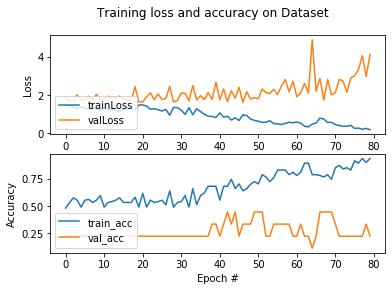

In [36]:
drawResults(historyAlexNet, EPOCHS,True)

## VGG

In [6]:
BACH_SIZE = 10
NUM_CLASSES = 5
VALIDATION_STEP = 1
LEARNING_RATE = 0.0001
EPOCHS = 80
EPOCHS_ONE = 50

In [16]:
VGGModel = VGGModel(NUM_CLASSES)
VGGModel.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            optimizer= tf.keras.optimizers.Adam(LEARNING_RATE),
            metrics=['accuracy'])

ValueError: Incompatible type conversion requested to type 'int32' for variable of type 'float32'

In [26]:
historyVGG = VGGModel.fit(x = trainAlexData, epochs=EPOCHS, steps_per_epoch=(len(trainSources)//BACH_SIZE), initial_epoch=0,
                         validation_data = valAlexData, validation_steps= VALIDATION_STEP)

Epoch 1/80


ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_1/Adam/mul_121}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node ConstantFoldingCtrl/loss_2/dense_6_loss/broadcast_weights/assert_broadcastable/AssertGuard/Switch_0/_19}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:StatefulPartitionedCall]